# Machine Learning

In [1]:
# Steps in machine learning
# The import our data
# Clean data 
# Build our model
# Split the data between train and test set - 80:20
# Train the model
# Predict

In [2]:
# load the following libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression #the selected algorithm
from statsmodels.graphics.correlation import plot_corr

In [50]:
# load the data
df_train = pd.read_csv('titanictrain.csv')
df_test = pd.read_csv('titanictest.csv')

In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
df_train.shape

(891, 12)

In [7]:
# Derive the shape of the datasets
rows, columns = df_train.shape
row, column = df_test.shape

print(f"There are {rows} rows and {columns} columns in the titanic train data")
print(f"There are {row} rows and {column} columns in the titanic test data")


There are 891 rows and 12 columns in the titanic train data
There are 418 rows and 11 columns in the titanic test data


In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
df_train[df_train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [13]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
# checking the Embarked column
df_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## Update missing data

In [19]:
# treat the missing data for Fare 
df_test.Fare.fillna(df_test.Fare.interpolate(), inplace = True)

# df_test.Fare.fillna(df_test.Fare.mean(), inplace = True) 


In [20]:
# fix the age missing data
df_train.Age.fillna(df_train.Age.mean(), inplace = True)
df_test["Age"].fillna(df_test.Age.mean(), inplace = True)

In [21]:
# fix the Embarked missing data
df_train.Embarked.fillna(df_train.Embarked.value_counts().idxmax(), inplace = True)

#df_train.Embarked.fillna("S", inplace = True)

In [22]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [23]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# Data Visualization

In [24]:
# drop the following columns
cols = ['Cabin', 'Ticket']
df_train = df_train.drop(cols, axis = 1)
df_test = df_test.drop(cols, axis = 1)

In [25]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

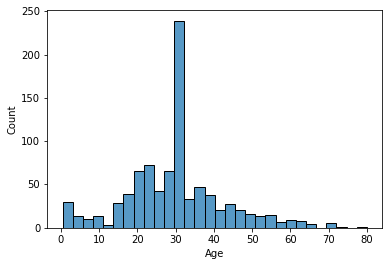

In [28]:
# distribution of age 
sns.histplot(x='Age', data = df_train)

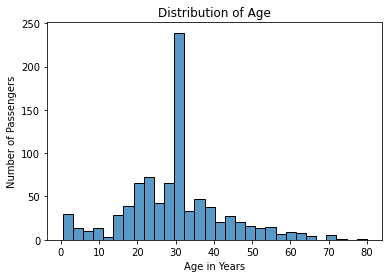

In [27]:
# distribution of age 
sns.histplot(x='Age', data = df_train)
plt.title("Distribution of Age")
plt.xlabel("Age in Years")
plt.ylabel("Number of Passengers")
plt.show()

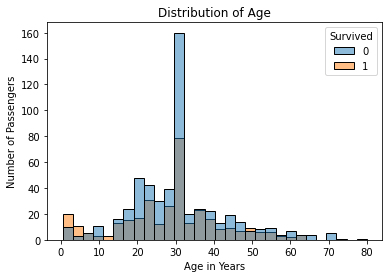

In [29]:
# distribution of age by survival 
sns.histplot(x='Age', data = df_train, hue = 'Survived')
plt.title("Distribution of Age")
plt.xlabel("Age in Years")
plt.ylabel("Number of Passengers")
plt.show()

In [30]:
# get the data seroes for salary and age
age = df_train["Age"]

<AxesSubplot:xlabel='Age', ylabel='Count'>

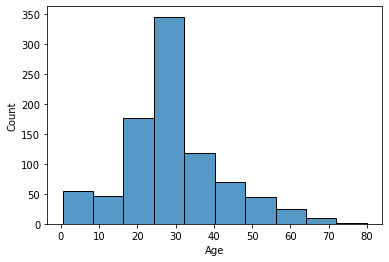

In [34]:
sns.histplot(x='Age', data = df_train, bins = 10)

<AxesSubplot:xlabel='Age', ylabel='Count'>

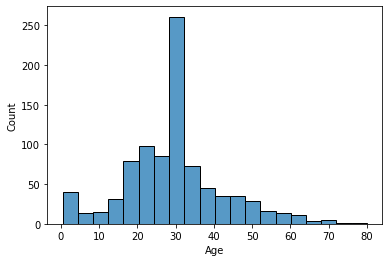

In [35]:
# distribution of age by survival 
sns.histplot(x='Age', data = df_train, bins = 20)


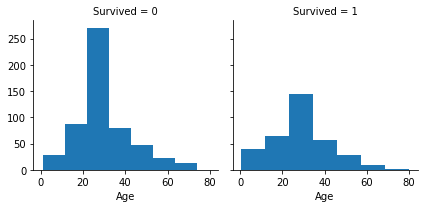

In [31]:
# calculate the bin for the chart
bin_width = 10
bn = int((age.max() - age.min()) / bin_width)

g = sns.FacetGrid(df_train, col = 'Survived')
g.map(plt.hist, 'Age', bins = bn)

# Data Manipulation

In [36]:
# convert categorical to numerical values for sex

df_train["Sex"] = df_train['Sex'].map({'female':1, "male": 0}).astype(int)
df_test["Sex"] = df_test['Sex'].map({'female':1, "male": 0}).astype(int)

In [37]:
# Embarked
emb = {'S':0, 'C': 1, "Q": 2}

df_train["Embarked"] = df_train['Embarked'].map(emb).astype(int)
df_test["Embarked"] = df_test['Embarked'].map(emb).astype(int)

In [38]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,0


In [39]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


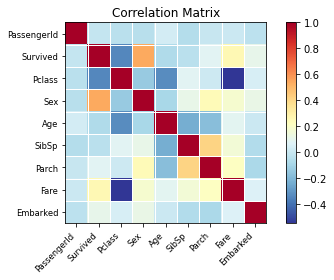

In [42]:
# correlation
corr = df_train.corr()
corr
fig = plot_corr(corr, xnames=corr.columns) 


# Model

In [43]:
x_train = df_train.drop(['Survived', 'PassengerId', 'Name'], axis = 1)
y_train = df_train['Survived']
x_test = df_test.drop(['PassengerId', 'Name'], axis = 1).copy()


In [ ]:
from sklearn.model_selection import train_test_split
x = df_full.drop(['Survived', 'PassengerId', 'Name'], axis = 1)
y = df_full['Survived']

Train:Test = 80:20
Train:Test:Further Test = 70:20:10
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.2)

In [45]:
# create logistic regression model
model = LogisticRegression()

# fit data to model
model.fit(x_train, y_train)

# predict the survivors
pred = model.predict(x_test)

# Model Evaluation

In [46]:
# model evaluation
score = model.score(x_train, y_train)
score

0.8047138047138047

In [47]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,8.0500,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,108.9000,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,7.2500,0
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,8.0500,0


In [49]:
df_test["Survived"] = pred
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,7.8292,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,7.0000,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,9.6875,2,0
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,8.6625,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,8.0500,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,108.9000,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,7.2500,0,0
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,8.0500,0,0
